# Environments

2021-03-17

N. Luettschwager

<a id="toc">*Table of contents*</a>

- [Introduction](#Introduction)
- [When things go wrong ...](#When-things-go-wrong-...)
- [Different results](#Different-results)
- [Creating a dedicated environment](#Creating-a-dedicated-environment)
- ["Freezing" your environment](#"Freezing"-your-environment)
- [Registering an environment with Jupyter](#Registering-an-environment-with-Jupyter)
- [Removing an environment](#Removing-an-environment)
- [Exercise](#Exercise)
- [Project creation workflow](#Project-creation-workflow)
- [Version numbers](#Version-numbers)

[&larr; back to index.md](index.md)

## Introduction

Here is an anecdote that perhaps many new Python programmers can tell:

> "I once had this nice little program that I wanted to show to a colleague. Some work that I had done a couple of months ago. I fired up my terminal, ran the script and ... suprise, suprise: it *crashed* on me! It turned out that I updated my packages since I finished that project and one of the updates broke my code."

One of the strengths of Python is its huge library of open source packages that are at your disposal, just a simple `pip install` away. This is really helpful and can save you a lot of time. You have to keep in mind though, that these **software packages** are (or should be) **actively maintained**, that is, they are living things that change over time.
It is not always practical for the developers to keep **backwards compatibility** and sometimes, of course, an **update can introduce a bug**.

[&uarr; back to TOC](#toc)

## When things go wrong ...

Consider the example in the next cell. Let's assume you were using Matplotlib 2.2.4 (the long term support, LTS, version, as of this writing). The code would work perfectly well and produce the stacked area plot you want:

matplotlib version 3.3.4


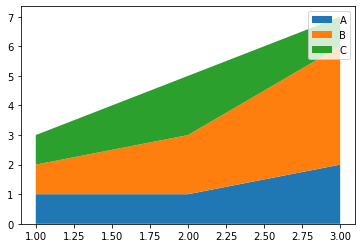

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
print(f"matplotlib version {mpl.__version__}")

from matplotlib import pyplot as plt
# the next line will raise an TypeError in Matplotlib v3.0.0
plt.stackplot([1, 2, 3], [1, 1, 2], [1, 2, 4], [1, 2, 1], labels=['A', 'B', 'C'])
plt.legend();

Now let's say Matplotlib 3.0.0 becomes available (and you really want that all new [&rarr;"twilight" colormaps](https://matplotlib.org/users/prev_whats_new/whats_new_3.0.html#cyclic-colormaps)) and you upgrade.

After the upgrade, you will find that the code above no longer works. Not because there was a change of the API (these are usually communicated early through deprecation warnings), but because some [&rarr;bug was introduced in Matplotlib 3.0.0](https://github.com/matplotlib/matplotlib/issues/12405). Matplotlib 3.0.1 fixes the bug, so after updating once more, your code works again.

You can see this behavior yourself. If you downgrade you Matplotlib package first to 2.2.4

> ```bash
> cd path/to/jupyter-course
> source env/bin/activate
> pip install matplotlib==2.2.4
> ```

... and you run the code, everything is fine. You install version 3.0.0

> ```bash
> pip install matplotlib==3.0.0
> ```

... and you get an error. Upgrading to 3.0.1 or the newest version (3.3.4 as of this writing)

> ```bash
> pip install matplotlib -U
> ```

and the code functions normally again.

[&uarr; back to TOC](#toc)

## Different results

Updates that break your code are easy to spot, but some updates may also introduce more **subtle changes** that you are not aware of. For example, you may re-run your code after an update and find that some results are slightly different. This can happen when package developers change the **particular implementation** of some algorithm. For example, the release notes of the current (1.17) Numpy version state:

> [&rarr; Replacement of the fftpack based fft module by the pocketfft library](https://numpy.org/doc/1.17/release.html#replacement-of-the-fftpack-based-fft-module-by-the-pocketfft-library)
>
> Both implementations have the same ancestor (Fortran77 FFTPACK by Paul N. Swarztrauber), but pocketfft contains additional modifications which improve both accuracy and performance in some circumstances. \[...\]

Of course we want the improved accuracy, but we should be aware of it.
Otherwise, we or other people may get confused why we/they cannot fully reproduce our results.

[&uarr; back to TOC](#toc)

## Creating a dedicated environment

How can you protect yourself from bugs that are introduced through updates, incompatible API changes or updates that change your results in a subtle way? The solution to this problem is to create a dedicated, [&rarr; virtual environment](https://docs.python.org/3.9/library/venv.html#venv-def) for your project.

A virtual environment behaves **like a separate Python installation**. Packages that you install into a virtual environment are not visible to your base (system) environment, nor to any other environment. Your environment is not affected by updates of your operating system. A virtual environment can be created easily and it can be equipped with the required packages using a single command.

The main commands that you need to type into the terminal are as follows:

1. `python3 -m venv path/to/your/environment`
2. `source path/to/your/environment/bin/activate` (bash/Linux/macOS), `path/to/your/environment/Scripts/activate.bat` (Windows)

The first command create the environment in the folder `path/to/your/environment` by running the module `venv` from the Python 3 standard library as a script (triggered by the `-m` flag). I will assume the folder name `env` in the following, which is a common choice. The second command activates the environment, meaning it prepends your PATH variable such that the commands `python` and `pip` (among others) now point to your new environment.
After activating the environment, the `pip install` command will install packages into your new environment. Everything else remains untouched.

You deactivate the environment with the command `deactivate` (you guessed it).

[&uarr; back to TOC](#toc)

## "Freezing" your environment

The dedicated environment in general and the tool `pip` in particular help us to define a very specific context in which our code should be executed.

Try typing

```bash
pip freeze
```

into your terminal. For me this yielded the following list:

```
altair==4.1.0
argon2-cffi==20.1.0
asteval==0.9.23
astroid==2.5.1
async-generator==1.10
attrs==20.3.0
backcall==0.2.0
bleach==3.3.0
bokeh==2.3.0
certifi==2020.12.5
cffi==1.14.5
chardet==4.0.0
colorama==0.4.4
cycler==0.10.0
decorator==4.4.2
defusedxml==0.7.1
entrypoints==0.3
flake8==3.9.0
flake8-polyfill==1.0.2
future==0.18.2
gitdb==4.0.5
GitPython==3.1.14
idna==2.10
ipykernel==5.5.0
ipython==7.21.0
ipython-genutils==0.2.0
ipywidgets==7.6.3
isort==4.3.21
jedi==0.18.0
Jinja2==2.11.3
jsonschema==3.2.0
jupyter-client==6.1.12
jupyter-core==4.7.1
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.0.0
kiwisolver==1.3.1
lazy-object-proxy==1.4.3
llvmlite==0.36.0
lmfit==1.0.2
MarkupSafe==1.1.1
matplotlib==3.3.4
mccabe==0.6.1
mistune==0.8.4
nbclient==0.5.3
nbconvert==6.0.7
nbdime==2.1.0
nbformat==5.1.2
nest-asyncio==1.5.1
notebook==6.2.0
numba==0.53.0
numpy==1.20.1
packaging==20.9
pandas==1.2.3
pandocfilters==1.4.3
parso==0.8.1
pep8-naming==0.11.1
pexpect==4.8.0
pickleshare==0.7.5
Pillow==8.1.2
pkg-resources==0.0.0
prometheus-client==0.9.0
prompt-toolkit==3.0.17
ptyprocess==0.7.0
pycodestyle==2.7.0
pycodestyle-magic==0.5
pycparser==2.20
pyflakes==2.3.0
Pygments==2.8.1
pylint==2.7.2
pyparsing==2.4.7
pyrsistent==0.17.3
python-dateutil==2.8.1
pytz==2021.1
PyYAML==5.4.1
pyzmq==22.0.3
requests==2.25.1
scipy==1.6.1
Send2Trash==1.5.0
six==1.15.0
smmap==3.0.5
terminado==0.9.3
testpath==0.4.4
toml==0.10.2
toolz==0.11.1
tornado==6.1
traitlets==5.0.5
typing-extensions==3.7.4.3
uncertainties==3.1.5
urllib3==1.26.4
vega-datasets==0.9.0
wcwidth==0.2.5
webencodings==0.5.1
widgetsnbextension==3.5.1
wrapt==1.11.2
```

This list contains all packages that are currently installed in my environment, complete with the exact version number.

Now, you or somebody with whom you shared your code could re-create your environment by typing out single `pip install` commands following this list, but fortunately, there is a better way.

Type into your terminal:

```bash
pip freeze > requirements.txt
```

This will redirect the output of `pip freeze` into the text file `requirements.txt`. You can install all dependencies listed in this file at once using the command:

```bash
pip install -r requirements.txt
```

**Including a requirements.txt in your project directory is a central step** in making your code shareable and re-useable by others. Not to mention that it may save you a lot of headaches.

[&uarr; back to TOC](#toc)

## Registering an environment with Jupyter

If you created a new environment, you will find that it does not automatically show up in Jupyter. How can you make the new environment available?

First, your new environment must be able to communicate with the Jupyter server. For this purpose, you have to install the `ipykernel` package through `pip install ipykernel`. Then, you have to tell Jupyter to register your environment:

> ```bash
> python -m ipykernel install --name="my-environment" --user
> ```

(Note that the environment needs to be active, of course. If you used the folder name "env", your command prompt should indicated the active environment by showing `(env)`.)

For the environment to show up in Jupyter, you may need to press F5 to refresh the website.

[&uarr; back to TOC](#toc)

## Removing an environment

You can remove an environment simply be deleting the respective folder, but
Jupyter will not automatically know that the environment has vanished.
You can remove it from Jupyter like so:

> ```bash
> jupyter kernelspec remove "my-environment"
> ```

## Exercise

</div>

- Create your own environment and register it with Jupyter
- Create a new notebook that uses the new environment as kernel
- Try to import numpy; install numpy into the environment, restart the notebook and try again
- Verify that you use the correct Python executable by running the following code

> ```python
> import sys
> sys.executable
> ```

## Project creation workflow

A good idea is to include a requirements.txt right from the start and update it whenever you add or update a package. A typical workflow when creating a new Python project may thus look like this:

```bash
mkdir my-project
cd my-project
echo "# My awesome project" > README.md
mkdir data notebooks
python3 -m venv env
source env/bin/activate
pip install bokeh ipykernel pandas scipy
python -m ipykernel install --name="my-project" --user
pip freeze > requirements.txt
```



This gets you started with a basic folder structure, readme file, a dedicated environment, a jupyter kernel, and some basic scientific packages. If you create projects regularly, you may want to save the empty folder structure as a template. Alternatively, you can write a script or use a tool like [&rarr; cookiecutter](https://github.com/cookiecutter/cookiecutter) to create a project with a good layout.

[&uarr; back to TOC](#toc)

## Version numbers

To conclude this introduction into environments, let's look a bit more closely at the output of `pip freeze`.

You can see that most of the package version numbers consist of three parts, `x.y.z`. This numbering scheme is called [&rarr; semantic versioning](https://packaging.python.org/guides/distributing-packages-using-setuptools/#semantic-versioning-preferred) and it helps you to understand in what way an update of a package changes its functionality.

The first number, the **major version number**, indicates **backwarts compatibility**. If, say, you are working with numpy v1.17 and tomorrow version 2.0 is released, it may be that some of your code that uses numpy does not work anymore, because numpy 2.0 is not fully backwarts compatible. If the major version of a package changes, you should **have a look at the release notes**. For example, for scipy you would find that quite some functions were removed when the package (finally) made its jump to v1.0.0 ([&rarr; see release notes](https://docs.scipy.org/doc/scipy/reference/release.1.0.0.html#backwards-incompatible-changes)).

The second number, the **minor version number**, indicates that **new functionality was added** in a way that *is* (or should be) backwarts compatible. Old code should still work fine with a package that has recieved some minor updates since the code was written.

The last number, the **maintenance version number**, indicates bug-fixes.

So what is up with some packages with version 0.x.y? **Major release 0** usually indicates that the **developers do not want to commit to a specific [API](glossary.md#API) yet**, and that **backwards incompatible changes can happen more often**. It does not necessarily mean that the package is not mature or buggy.

Another version scheme is date based. `pip` itself uses date based versioning. Currently, the version is "21.0.1" (you can type `pip --version` in the terminal to see this), indicating that the release is from 20**21**, not that it is the 21th major release. While it is nice to know how old a package is, this scheme does not inform about API compatibility.

[&uarr; back to TOC](#toc)

[&larr; back to index.md](index.md)

[&rarr; next notebook: version-control.ipynb](version-control.ipynb)